In [2]:
from functions.utils_agents import *
import warnings

warnings.filterwarnings('ignore')

In [4]:
agents = load_data(path='../donnees/agents_cleaned.csv')

In [5]:
agents.head()

,agentId,name,siret,address,city,zipcode,country,department,cleaned,cleaned_country,cleaned_city,cleaned_address,cleaned_department,zipcode_str,cleaned_zipcode
0,0,#APTIC,8.445059e+13,87 QUAI DE QUEYRIES,BORDEAUX,33100.0,FR,33,8.445059e+13,FR,BORDEAUX,87 QUAI DE QUEYRIES,33,33100.0,33100.0
1,1,LEGALLAIS SAS,1.000000e+13,TSA 70004,CAEN;,75008.0,FR,75,1.000000e+13,FR,CAEN;,TSA 70004,75,NaN,75008.0
2,2,SOCIETE CORSE TRAVAUX,3.304645e+13,RN 200,ALERIA,20270.0,FR,2B,3.304645e+13,FR,ALERIA,RN 200,2B,20270.0,20270.0
3,3,BECTON DICKINSON FRANCE SAS,1.000000e+13,11 RUE ARISTIDE BERGES ;,PONT E CLAIX,75008.0,FR,75,1.000000e+13,FR,PONT E CLAIX,11 RUE ARISTIDE BERGES ;,75,NaN,75008.0
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,1.000000e+13,1,PARIS,75008.0,FR,75,1.000000e+13,FR,PARIS,1,75,NaN,75008.0


# Question 1

Q1: peut-on identifier des classes de similarité d’agents économiques? Des lots?

Nous allons nous concentrer sur les variables:
- **city**
- **country**
- **department**

Pour le clustering, nous allons ajouter d'autres valeurs numériques:
- **vc**: nombre d'id different pour chaque agent 
- **buyers**: nombre de lots achété par l'agent
- **suppliers**: nombre de lots vendu par l'agent

In [8]:
buyers = load_data(path='../donnees/LotBuyers.csv')
suppliers = load_data(path='../donnees/LotSuppliers.csv')

In [9]:
buyers_gb_1 = get_gb_count(buyers, by_col='agentId', count_col='buyers')
suppliers_gb_1 = get_gb_count(suppliers, by_col='agentId', count_col='suppliers')
agents_gb_1 = get_gb_count(agents, by_col='name', count_col='vc')

In [10]:
other_1 = buyers_gb_1.drop(columns=['proportion'])
other_2 = suppliers_gb_1.drop(columns=['proportion'])
other_3 = agents_gb_1.drop(columns=['proportion'])

In [11]:
others = [
    ('agentId', 'left', other_1),
    ('agentId', 'left', other_2),
    ('name', 'left', other_3)
]
data = agents[['agentId', 'name','cleaned_city', 'cleaned_country', 'cleaned_department']]

In [12]:
agents_merged = merge_data(data, others)

In [13]:
agents_merged

,agentId,name,cleaned_city,cleaned_country,cleaned_department,buyers,suppliers,vc
0,0,#APTIC,BORDEAUX,FR,33,0.0,8.0,1
1,1,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5
2,2,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2
3,3,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1
...,...,...,...,...,...,...,...,...
301091,301091,STEF,AVIGNON,FR,84,0.0,7.0,7
301092,301092,STEF,REICHSTETT,FR,67,0.0,1.0,7
301093,301093,STEF,LOUDEAC,FR,22,0.0,5.0,7
301094,301094,STEF,BEGLES,FR,33,0.0,3.0,7


In [16]:
numeric_columns = get_dtypes_columns(agents_merged, dtypes=['number'], to_remove=['agentId'])
numeric_columns

['buyers', 'suppliers', 'vc']

['buyers', 'suppliers', 'vc']

In [17]:
categorical_columns = get_dtypes_columns(agents_merged, dtypes=['object'], to_remove=['name'])
categorical_columns

['cleaned_city', 'cleaned_country', 'cleaned_department']

100%|██████████| 19/19 [06:09<00:00, 19.47s/it]


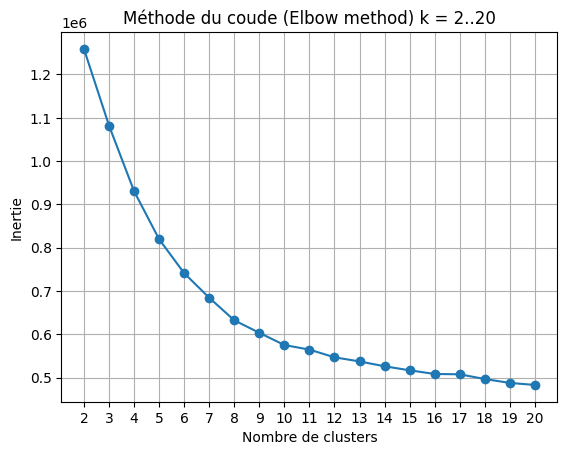

In [18]:
best_k = run_multiple_kmeans(
    data=agents_merged, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns,
    end = 20,
    saveas = '../images/04_questions_agents_01.png'
)

In [19]:
best_k

4

In [20]:
clusters_1, inertia_1 = do_kmeans(
    data=agents_merged, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns,
    k=best_k
)

In [31]:
clusters_1 = load_data(path='../donnees/agents_cleaned_clusters.csv')

In [33]:
cluster_1_corr_cat, cluster_1_corr_num = get_all_corr_cat(
    data = clusters_1, 
    col = 'cluster', 
    num_cols = numeric_columns, 
    cat_cols = categorical_columns
)

(4, 22036) cluster cleaned_city
(4, 105) cluster cleaned_country
(4, 109) cluster cleaned_department


In [35]:
cluster_1_corr_cat.sort_values(by='cluster', ascending=False)

,cluster
cleaned_city,0.163401
cleaned_department,0.030994
cleaned_country,0.007028


In [36]:
cluster_1_corr_num

,cluster
buyers,0.0
suppliers,0.0
vc,0.0


# Question 3

Q3: comment interpréter ces classes, que signifient-elles?

In [39]:
cleaned_city_corr_data = get_corr_data(
    df = clusters_1, 
    xcol = 'cluster', 
    ycol = 'cleaned_city'
)

In [40]:
cleaned_city_corr_data

cleaned_city,) BERGERAC,) BORGO ) AJACCIO ) BASTIA,) PINEUIL,***,*****,.,. PESSAC. . NIZEROLLES. . TOULOUSE. . FLOURENS.,; LA CHAPELLE SAINT LUC,A GRAZ,A VIENNE,...,ZUID HOLLAND THE NETHERLANDS,ZURICH,ZURICH (SUISSE),ZUTKERQUE,ZUTPHEN,ZUYDCOOTE,ZUYTPEENE,ZWAAG,ZWIJNDRECHT,Ô DE SELLE
cluster,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,12,1,3,1,2,1,1,2,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
